## Description

This notebook visualizes multimodal concepts learnt by our decomposition approach for concept dictionary learnt for LLaVA-v1.5 for "Train" token on COCO

### Pre-requisites for further usage
1. The notebook builds on output of ```src/save_features.py``` and ```src/analyse_features.py```.
2. ```src/save_features.py``` saves representation of a model for a particular token of interest
3. ```src/analyse_features.py``` decomposes the the saved representations to learn the concept vectors and also extracts information about its multimodal grounding. All this information is saved in a file
4. To visualize for other target-tokens/models/representations/decomposition, information about usage of these files is in ```src/examples``` folder

### Import key packages

In [19]:
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib
print("Matplotlib version for info:", matplotlib.__version__)

Matplotlib version for info: 3.8.2


### Loading file containing decomposition results and grounding info for token "train"

In [20]:
results_dict = torch.load('/home/parekh/xl-vlms/results/snmf_results_train.pth')
print(results_dict.keys())

concepts = results_dict['concepts']
activations = results_dict['activations']
text_grounding = results_dict['text_grounding']
image_paths = results_dict['image_grounding_paths']
print (f"Concepts shape: {concepts.shape}", f"Activations shape: {activations.shape}")
num_concepts = concepts.shape[0]

dict_keys(['concepts', 'activations', 'decomposition_method', 'text_grounding', 'image_grounding_paths'])
Concepts shape: torch.Size([20, 4096]) Activations shape: torch.Size([2085, 20])


### Function to generate multimodal grounding visualization of a given concept

In [21]:
def visualize_grounding(concept_idx, text_grounding, image_paths):
    words = text_grounding[concept_idx]
    paths = image_paths[concept_idx]
    num_imgs = len(paths)
    images = []
    for path in paths:
        cur_img = plt.imread(path)
        cur_img = np.array(Image.fromarray(cur_img).resize([256, 256]))
        images.append(cur_img)
    width = num_imgs*2+0.1
    fig = plt.figure(figsize=(width, width/5))
    for i in range(num_imgs):
        fig.add_subplot(1, num_imgs, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    fig.suptitle('Concept ' + str(concept_idx) + ': ' + str(words)) 

### Putting everything together to visualize all concepts for "train"

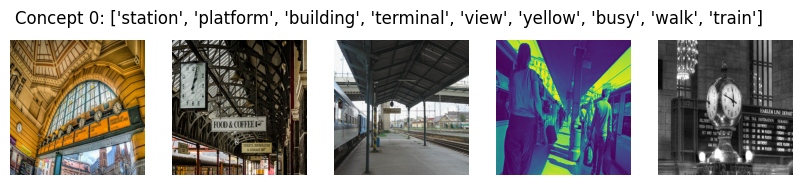

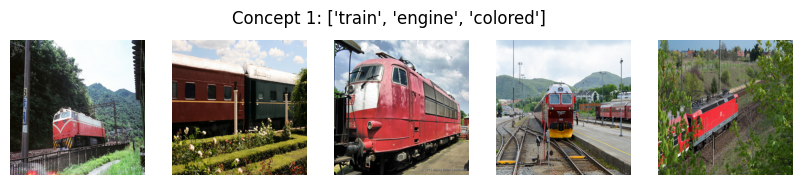

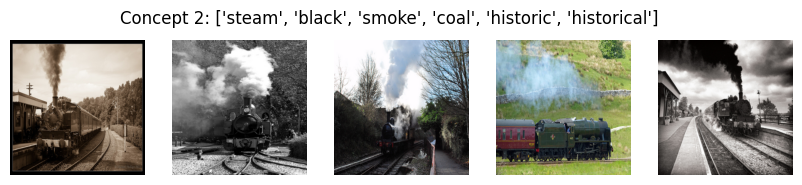

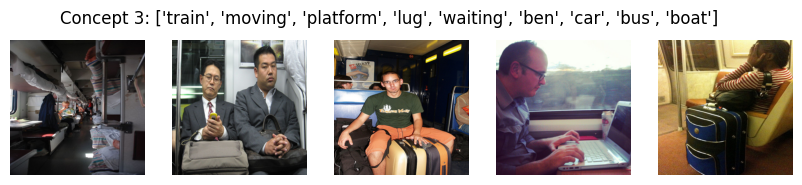

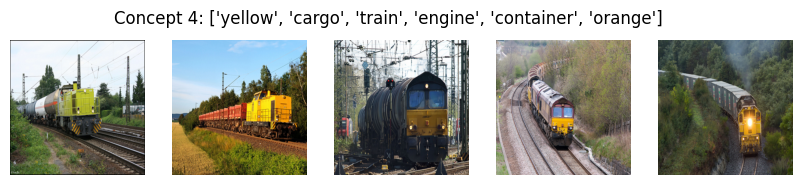

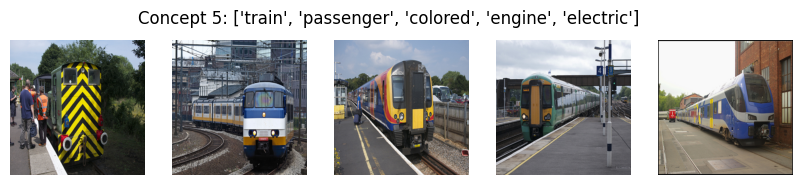

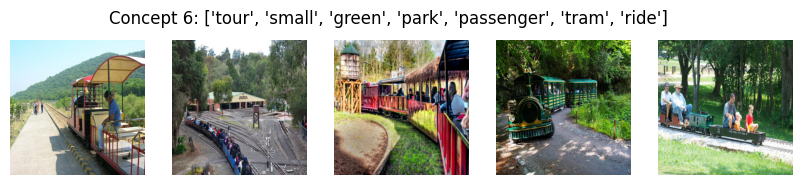

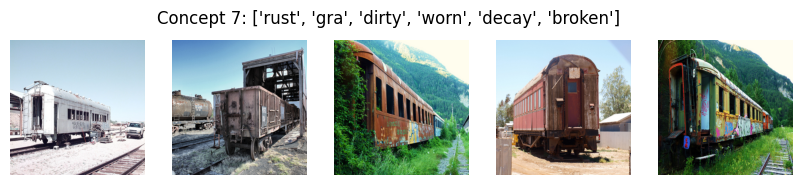

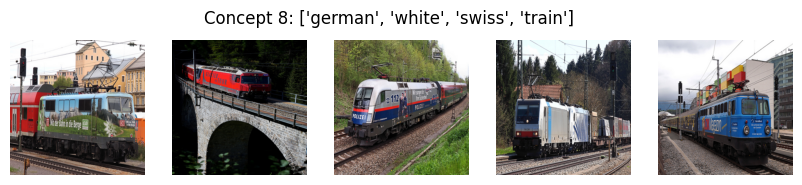

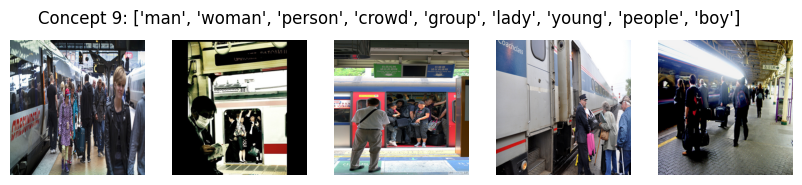

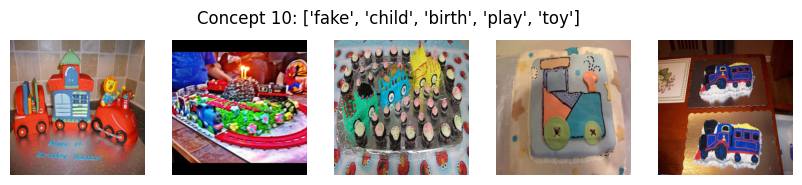

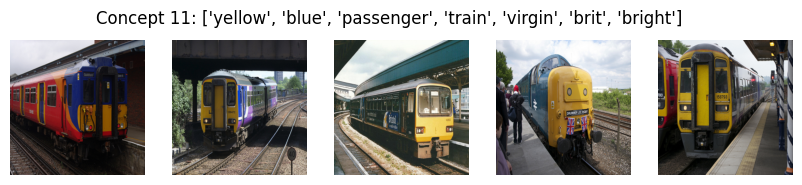

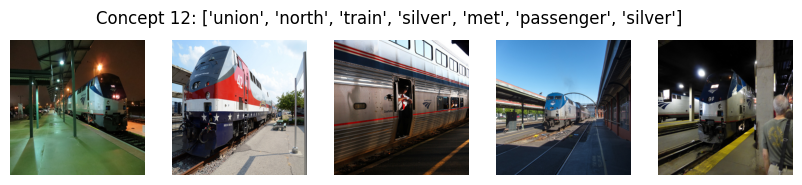

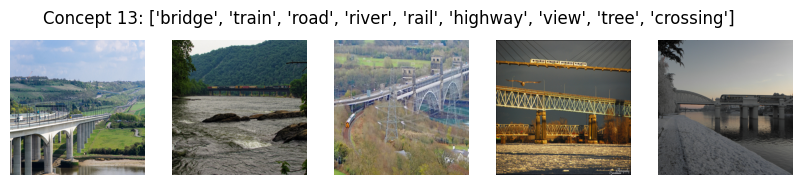

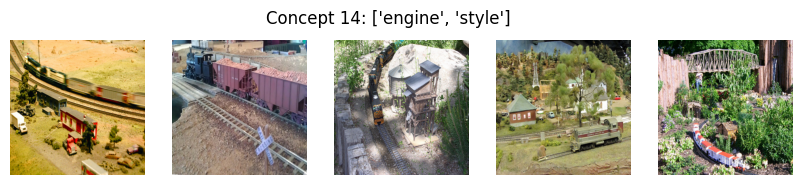

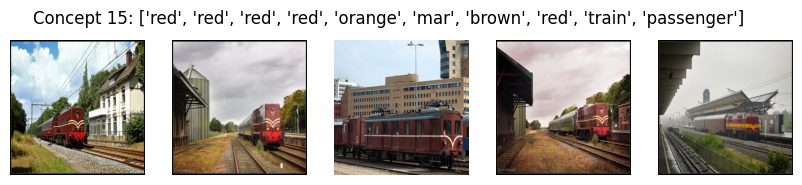

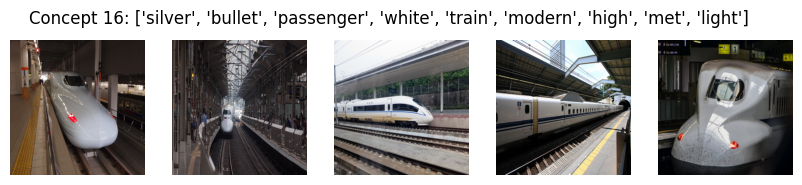

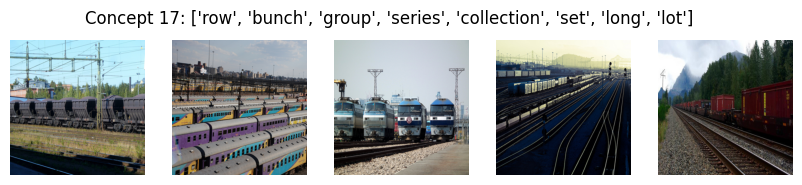

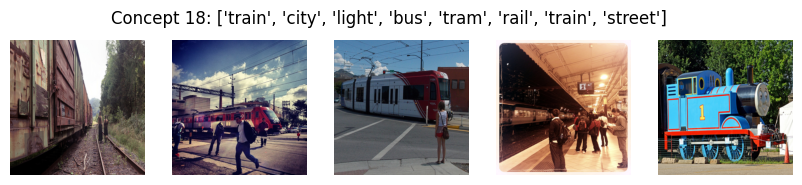

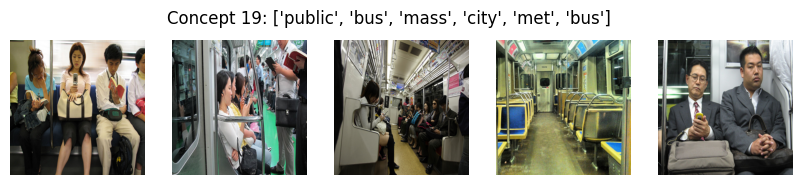

In [22]:
for k in range(num_concepts):
    visualize_grounding(k, text_grounding, image_paths)